In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree

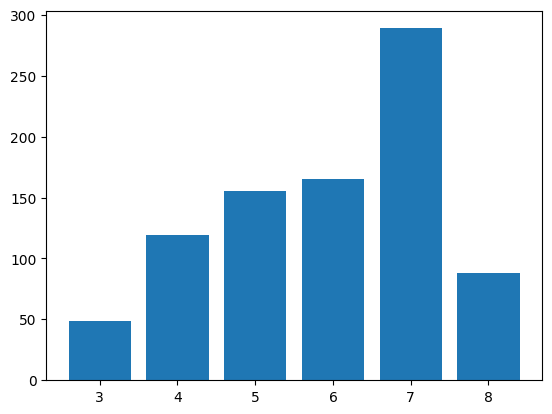

In [2]:
vin_data = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/vin.csv")
plt.bar(vin_data["quality"], vin_data["total sulfur dioxide"])
plt.show()

In [3]:
vin_data["kvalitetskategoriene"] = vin_data["quality"].apply(lambda x: 0 if x < 6 else 1)
vin_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kvalitetskategoriene
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [31]:
# LogisticRegression

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()


criteria = vin_data[['alcohol', 'pH', 'fixed acidity', 'density']] # features :, 'free sulfur dioxide', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates'
categories = vin_data['kvalitetskategoriene']                         # labels

test_amount = 2

# A loop for testing different training sizes

ml_data = train_test_split(criteria, categories, train_size=0.8, random_state=42)

training_criteria = ml_data[0]
test_criteria = ml_data[1]
training_categories = ml_data[2]
testkategorier = ml_data[3]

model = LogisticRegression(max_iter=20000)  # Makes the model
model.fit(training_criteria, training_categories)   # Trains the model

predictions = model.predict(test_criteria)

precision = precision_score(testkategorier, predictions, average='macro')

print(precision)

0.7351539303016097


In [11]:
print(model_eval)

                model  treningsandel  accuracy
0  LogisticRegression            0.1  0.723976
1  LogisticRegression            0.2  0.722102
2  LogisticRegression            0.3  0.724671
3  LogisticRegression            0.4  0.714583
4  LogisticRegression            0.5  0.728434
5  LogisticRegression            0.6  0.727481
6  LogisticRegression            0.7  0.720656
7  LogisticRegression            0.8  0.739290
